!!                                                     Music Popularity Prediction: Overview

Music popularity prediction means using regression techniques to forecast the popularity of songs based on various music features and metadata. Expected results include accurate predictions of a song’s future performance in terms of streams, downloads, and chart positions, which enable music producers, artists, and marketers to make informed decisions.

To get started with music popularity prediction, we need a dataset of various songs with their musical features and historical data on how much popularity the songs got. I found an ideal dataset for this task which includes 227 music tracks, each described by their music features along with additional metadata like track name, artists, album name, and release date

In [1]:
#!pip install pandas numpy scipy statsmodels scikit-learn tensorflow keras xgboost lightgbm matplotlib seaborn plotly plotly-express jupyter ipykernel

Music Popularity Prediction with Python
Now, let’s get started with the task of music popularity prediction by importing the necessary Python libraries and the dataset:

In [2]:
import pandas as pd
spotify = pd.read_csv("Spotify_data.csv")

spotify.head()

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019


The dataset has an unnamed column, I’ll drop it and move forward:

In [3]:
spotify = spotify.drop(columns= ["Unnamed: 0"])
spotify.head()

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,External URLs,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,https://open.spotify.com/track/6AI3ezQ4o3HUoP6...,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,https://open.spotify.com/track/2HYFX63wP3otVIv...,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,https://open.spotify.com/track/7iabz12vAuVQYye...,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,https://open.spotify.com/track/331l3xABO0HMr1K...,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,https://open.spotify.com/track/48lxT5qJF0yYyf2...,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019


Now, let’s have a look at the column info before moving forward:

In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        227 non-null    object 
 1   Artists           227 non-null    object 
 2   Album Name        227 non-null    object 
 3   Album ID          227 non-null    object 
 4   Track ID          227 non-null    object 
 5   Popularity        227 non-null    int64  
 6   Release Date      227 non-null    object 
 7   Duration (ms)     227 non-null    int64  
 8   Explicit          227 non-null    bool   
 9   External URLs     227 non-null    object 
 10  Danceability      227 non-null    float64
 11  Energy            227 non-null    float64
 12  Key               227 non-null    int64  
 13  Loudness          227 non-null    float64
 14  Mode              227 non-null    int64  
 15  Speechiness       227 non-null    float64
 16  Acousticness      227 non-null    float64
 1

Now, let’s get started with EDA. As popularity is the target variable, I’ll have a look at the relationship between all the music features with popularity:

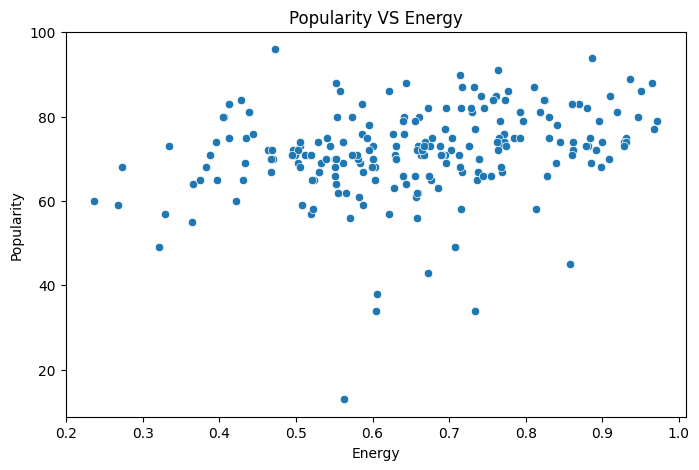

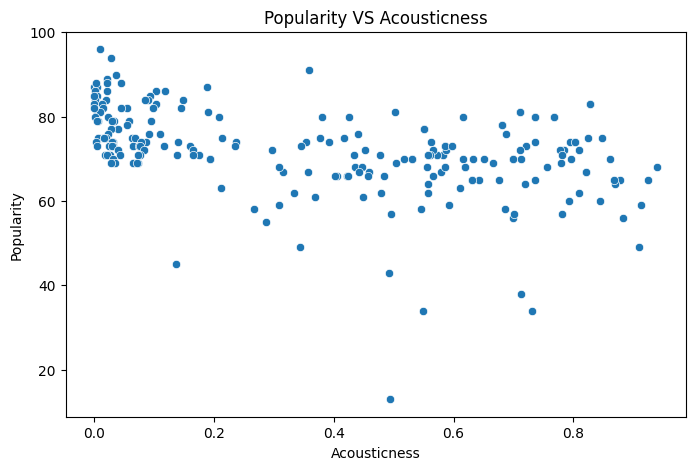

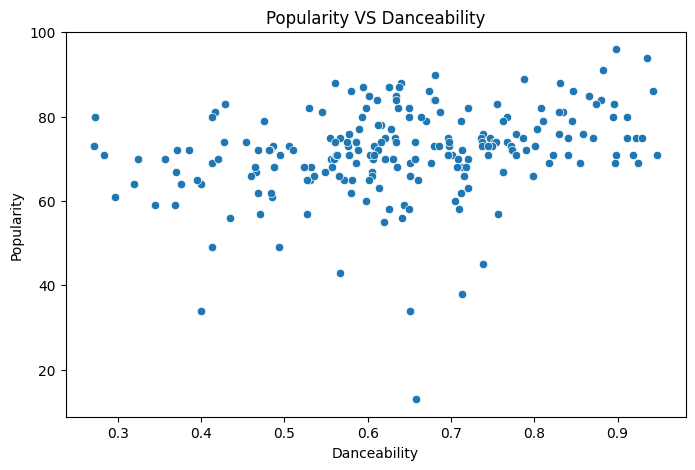

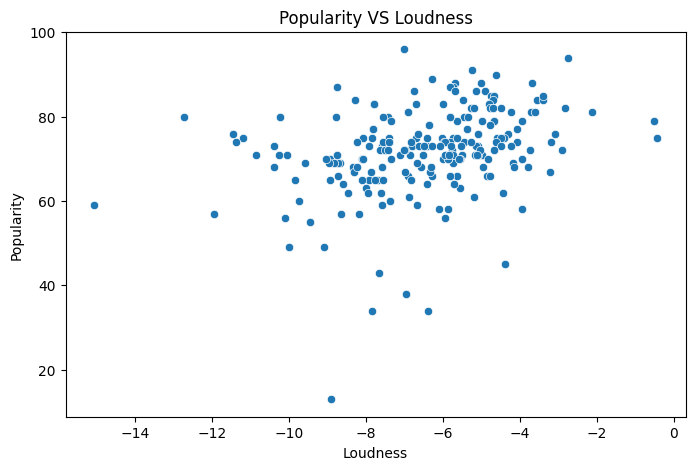

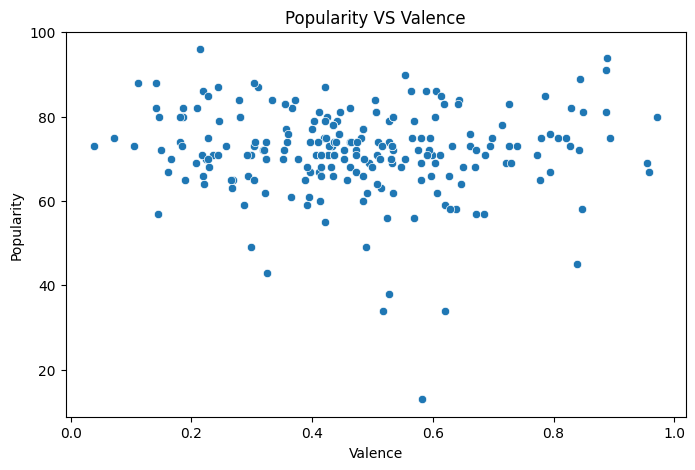

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ["Energy","Acousticness","Danceability","Loudness","Valence" ]

for feature in features:
    plt.figure(figsize= (8,5))
    sns.scatterplot( data= spotify , x = feature , y = "Popularity")
    plt.title(f'Popularity VS {feature}')
    plt.show()

From these visualizations, we can observe that higher energy levels and danceability tend to correlate positively with higher popularity scores. Conversely, increased acousticness and lower loudness levels generally correspond with lower popularity, suggesting that more energetic and less acoustic tracks are favoured. Valence shows a weaker, less clear relationship with popularity, indicating that the emotional positivity of a track alone doesn’t strongly predict its popularity.

Now, let’s have a look at the correlation between all the features:

In [6]:
numerical_columns = spotify.select_dtypes(include= ["float64","int"]).columns
numerical_columns

Index(['Popularity', 'Duration (ms)', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo'],
      dtype='object')

In [7]:
spotify_numerics = spotify[numerical_columns]
spotify_numerics

,Popularity,Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,96,274192,0.898,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,94,227239,0.936,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,91,140733,0.882,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,90,149668,0.681,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,89,144846,0.788,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,66,272680,0.565,0.744,7,-5.817,1,0.0446,0.4030,0.000000,0.0853,0.415,134.068
223,58,309103,0.626,0.522,7,-5.857,1,0.0317,0.6860,0.000000,0.4100,0.628,118.001
224,62,281992,0.484,0.565,11,-7.954,1,0.0347,0.4790,0.000002,0.1050,0.607,82.653
225,65,305232,0.602,0.374,10,-9.849,0,0.0328,0.9240,0.000008,0.0840,0.388,101.855


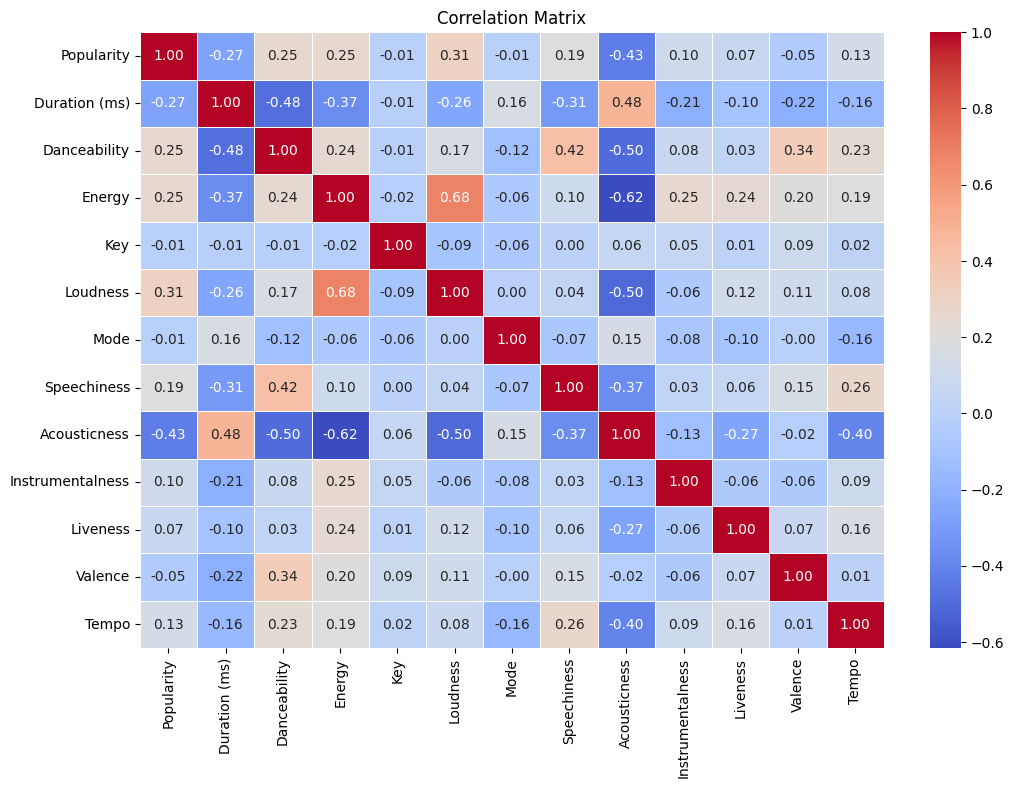

In [8]:
corr_matrix = spotify_numerics.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data= corr_matrix , annot= True , cmap= "coolwarm" , fmt= ".2f" , linewidths= 0.5)
plt.title("Correlation Matrix")
plt.show()

From the above correlation matrix, we can see that popularity has a moderate positive correlation with loudness (0.31) and danceability (0.25), indicating that louder and more danceable tracks tend to be more popular. There is a moderate negative correlation between popularity and acousticness (-0.43), suggesting that tracks with higher acousticness are generally less popular. Energy also has a positive correlation with popularity (0.25).

Now, let’s have a look at the distribution of all the music features:

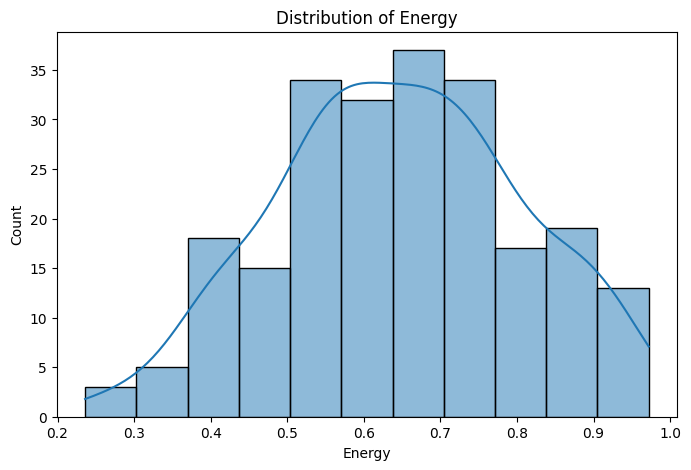

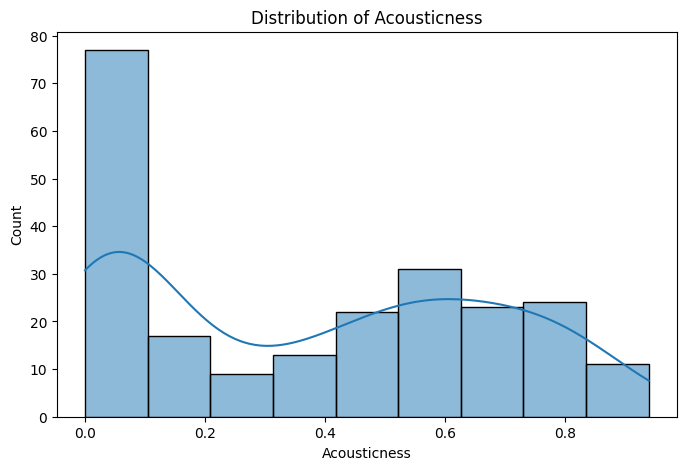

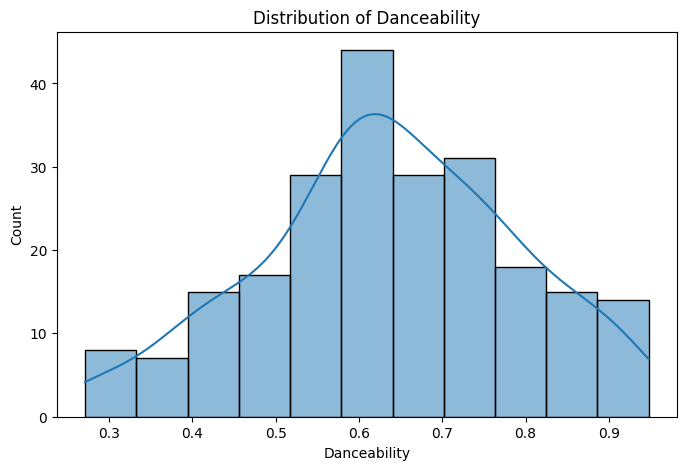

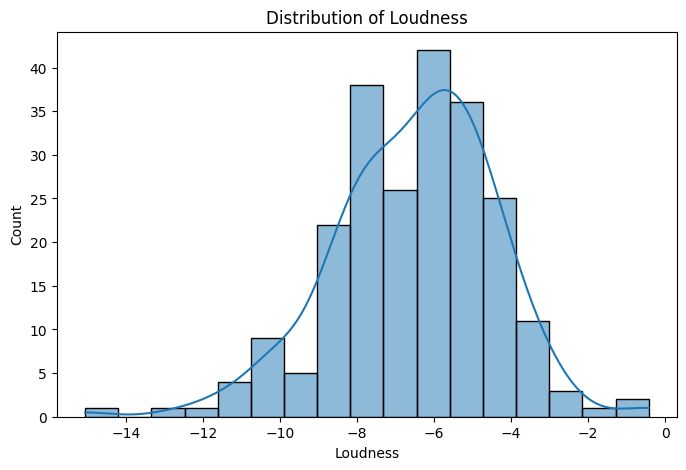

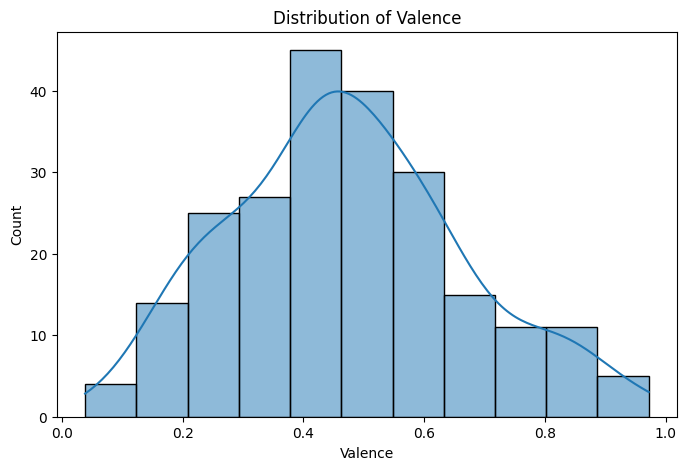

In [9]:
for feature in features:
    plt.figure(figsize = (8,5))
    sns.histplot(spotify[feature],kde = True)
    plt.title(f'Distribution of {feature}')
    plt.show()

The distribution of energy is roughly bell-shaped, which indicates a balanced range of energy levels in the tracks. Valence and danceability also follow a similar distribution, with most tracks having mid-range values, which suggests an even mix of emotionally positive and danceable tracks. Loudness has a near-normal distribution centred around -6 dB, which reflects typical volume levels in the dataset. Acousticness, however, is skewed towards lower values, indicating that most tracks are not highly acoustic.

Feature Selection and Model Training
Based on the correlation analysis and visualizations, the following features show a significant relationship with popularity and can be used to train a music popularity prediction model:

*Energy
*Valence
*Danceability
*Loudness
*Acousticness
*Tempo
*Speechiness
*Liveness


These features capture various audio characteristics that influence the popularity of music tracks.

The next step is to train a Machine Learning model to predict the popularity of music using the features we have selected. So, let’s split and scale the data and then train the model using the random forest regression algorithm:

In [10]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

#SELECT THE FEATURE AND TARGET VARIABLE

spotify_features = ["Energy", "Valence","Danceability","Loudness","Acousticness"]

X= spotify[spotify_features]
y= spotify["Popularity"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)


#NORMALIZE THE FEATURES 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#DEFINING THE PARAMETER GRID FOR RANDOM FOREST

param_grid = {
        "n_estimators" : [50,100,200],
        "max_features": ["auto","sqrt", "log2"],
        "max_depth" : [10,20,30,None],
        "min_samples_split" : [2,5,10],
        "min_samples_leaf" : [1,2,4]   
            }

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state= 42),param_grid , refit = True , verbose = 2 , cv = 5 )

grid_search_rf.fit(X_train_scaled,y_train)

best_param_rf = grid_search_rf.best_params_

best_rf_model = grid_search_rf.best_estimator_

y_pred_best_rf = best_rf_model.predict(X_test_scaled)

print("Best Parameters:", best_param_rf)
print("R² Score:", r2_score(y_test, y_pred_best_rf))
print("MSE:", mean_squared_error(y_test, y_pred_best_rf))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; 

C:\Users\ahussain\Documents\Anaconda3\envs\py310_env\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahussain\Documents\Anaconda3\envs\py310_env\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahussain\Documents\Anaconda3\envs\py310_env\lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "C:\Users\ahussain\Documents\Anaconda3\envs\py310_env\lib\site-packages\sklearn\base.py", l

Note: I selected the random forest algorithm after going through various algorithms. The random forest algorithm resulted in better performance in comparison to the other algorithms after hyperparameter tuning.

Now, let’s have a look at the actual vs predicted results of the test data:

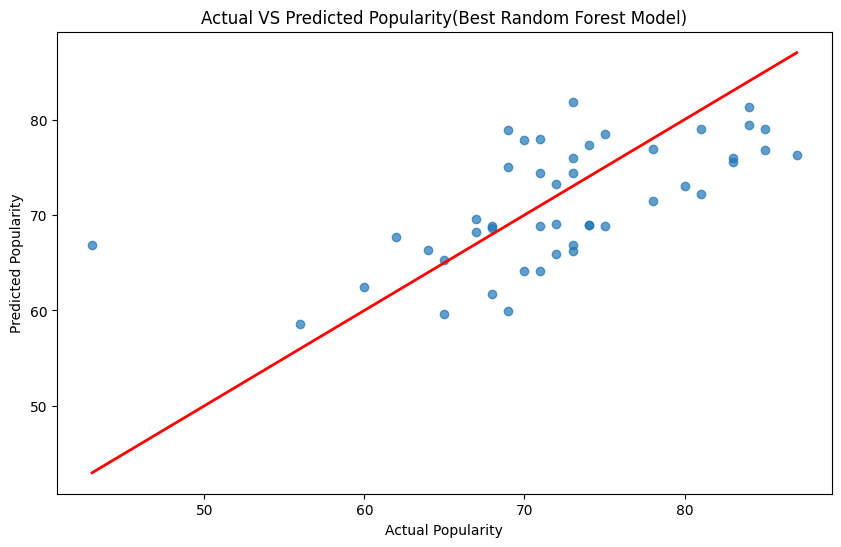

In [11]:
#MAKE PREDICTION

y_pred_best_rf = best_rf_model.predict(X_test_scaled)

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_best_rf, alpha= 0.7)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)] , color = "red" , linewidth = 2)

plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual VS Predicted Popularity(Best Random Forest Model)")
plt.show()